In [1]:
# Load all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import LogisticRegression

In [2]:
# Load dataset

d = datasets.load_iris()

In [3]:
# shape

d.data.shape , d.target.shape

((150, 4), (150,))

In [4]:
#characteristics of the iris dataset

da=sb.load_dataset('iris')
da.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# initialisation

data=d.data
target=d.target

In [6]:
# slicing and train the model

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

# COMPARISION OF ACCURACIES USING DIFFERENT ALGORITHMS

In [7]:
#KNN model

knn=KNeighborsClassifier()   
knn.fit(x_train,y_train)

#gaussian Naibe baeysian model

nb=GaussianNB()
nb.fit(x_train,y_train)

#decision tree model

dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

#svm model

svc=SVC(kernel='poly',C=5,gamma=1000).fit(x_train,y_train)

#printing all the accuracies

print('KNN accuracy is {}' .format(metrics.accuracy_score(y_test,knn.predict(x_test))*100))
print('GuassianNB accuracy is {}' .format(metrics.accuracy_score(y_test,nb.predict(x_test))*100))
print('Decision Tree accuracy is {}' .format(metrics.accuracy_score(y_test,dt.predict(x_test))*100))
print('SVM accuracy is {}' .format(metrics.accuracy_score(y_test,svc.predict(x_test))*100))

KNN accuracy is 96.66666666666667
GuassianNB accuracy is 96.66666666666667
Decision Tree accuracy is 96.66666666666667
SVM accuracy is 96.66666666666667


# PLOTTING Linear Regression 

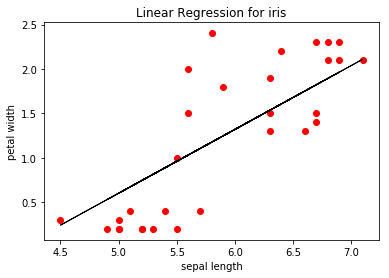

In [8]:
df=sb.load_dataset('iris')
ip=df.loc[:,'sepal_length']
op=df.loc[:,'petal_width']
ip=np.array(ip).reshape(-1,1)
op=np.array(op).reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,lr.predict(x_test),color='black',linewidth=1)
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('Linear Regression for iris')
plt.show()

# PLOTTING LOGISTIC REGRESSION

Iteration: 100/100 | Cost 0.32 | Elapsed: 0:00:00 | ETA: 0:00:00

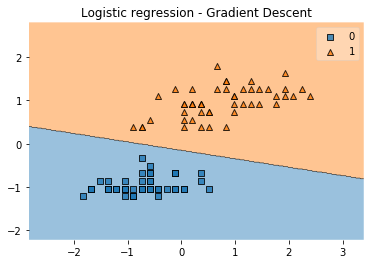

In [9]:
x,y=iris_data()
x=x[:,[0,3]] #sepal length and petal width
x=x[0:100] #class 0 and class 1
y=y[0:100] #class 0 and class 1

#standardize

x[:,0]=(x[:,0]-x[:,0].mean())/x[:,0].std()
x[:,1]=(x[:,1]-x[:,1].mean())/x[:,1].std()

lg= LogisticRegression(eta=0.1,   #evaluation time
                        l2_lambda=0.0,
                       epochs=100,   #how many we want to train 
                       minibatches=1,  #for gradient descent
                       random_seed=1,
                       print_progress=3)

lg.fit(x,y)
plot_decision_regions(x,y,clf=lg) #in clf , u can use other than logistic regression as well
plt.title('Logistic regression - Gradient Descent')
plt.show()

# SCATTER PLOT MATRIX FOR IRIS DATA

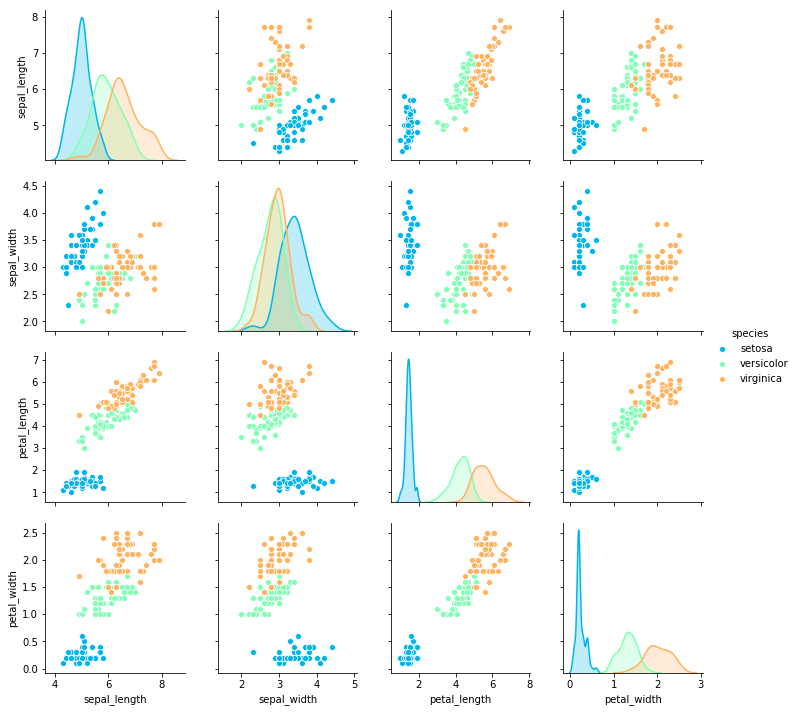

In [10]:
df=sb.load_dataset('iris')
sb.pairplot(df,hue='species',kind='scatter',diag_kind='kde',palette='rainbow')

# HEATMAP FOR IRIS DATA

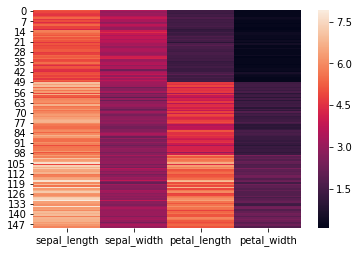

In [11]:
da=sb.load_dataset('iris')
d=da.drop('species',axis=1)
sb.heatmap(d)